In [33]:
import sys
sys.path.append('/home/imager/src.git/constrained_foopsi_python')

In [2]:
import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
from constrained_foopsi import *
%matplotlib inline

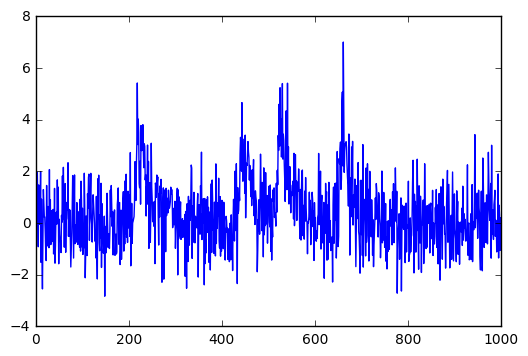

In [8]:
plt.plot(y)

In [20]:
np.random.seed(1200)
T = int(1e3);
#T=1000
pr = 0.005;
sp = np.random.uniform(0,1,T)<pr
sp.astype(float)

gr = [0.95,0.8]
g = np.array([np.sum(gr),-np.prod(gr)])

c = scs.lfilter(np.array([1]),np.concatenate([np.array([1.]),-g]),sp)
sn = 0.1;
y = c + sn*np.random.normal(0,1,T) 

In [40]:
c2,b2,c12,g2,sn2,sp2 = constrained_foopsi(y)

In [22]:
gd_vec = np.max(np.roots(np.concatenate([np.array([1]),-g.flatten()])))**np.arange(T)
c_inferred = c2 + b2 + c12*gd_vec

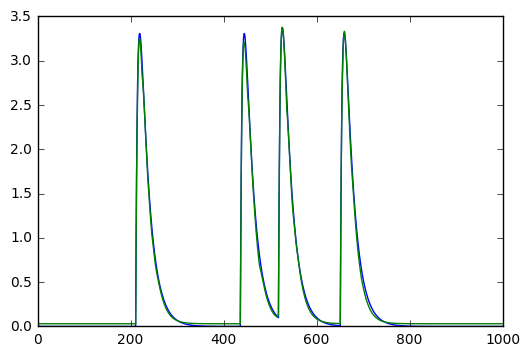

In [23]:
plt.plot(np.arange(T),c,np.arange(T),c_inferred)

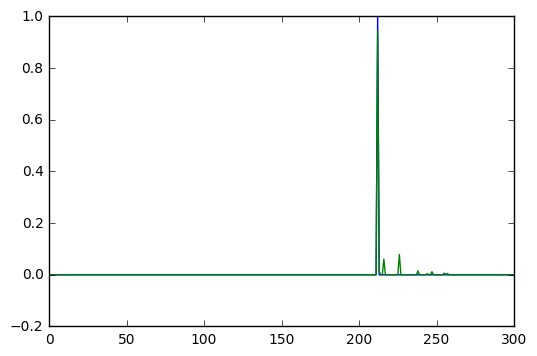

In [24]:
plt.plot(sp)
plt.plot(sp2)
plt.gca().set_xbound(0,300)

In [70]:
def wiener_deconvolution(signal, kernel, snr):
    "lambd is the SNR"
    from scipy import fft,ifft
    kernel = np.hstack((kernel, np.zeros(len(signal) - len(kernel)))) # zero pad the kernel to same length
    H = fft(kernel)
    deconvolved = np.real(ifft(fft(signal)*np.conj(H)/(H*np.conj(H) + snr**2)))
    return deconvolved

In [116]:
decon = wiener_deconvolution(y,k_,sn)

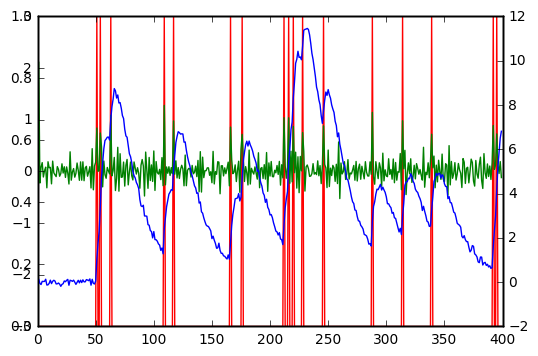

In [117]:
plt.plot(sp[:400],color = 'r')
plt.twinx()
plt.plot(decon[:400],color = 'g')
plt.twinx()
plt.plot(y[:400])

In [25]:
from matplotlib import pyplot as plt
from IPython.display import display,SVG
#%matplotlib inline
import figurefirst as fifi
from thllib import flylib as flb
import numpy as np
#import local_project_functions as lpf
from thllib import util

In [26]:
flynumbers = \
list(range(1389,1402)) #+ \

In [27]:
flylist = [flb.NetFly(fnum) for fnum in flynumbers]

In [28]:
l = [fly.open_signals() for fly in flylist]

In [29]:
fly = flylist[4]

In [36]:
snum = 4
l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02
sig = fly.ca_cam_left_model_fits['iii3'][idxs]

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


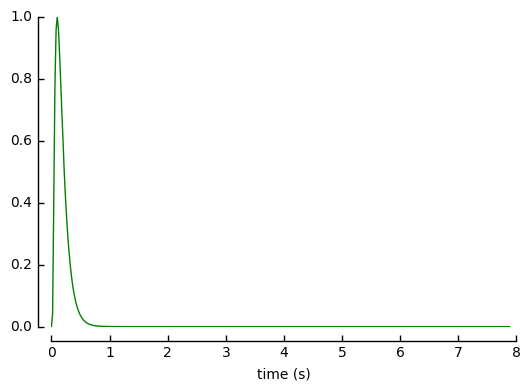

In [68]:
sp = 20. #sample period ms
MK_TON = 100/1000. #ms
MK_TOFF = 3000/1000. #ms
MK_TOFF2 = 100/1000.
#MK_TON = MK_TON/sp #samples
#MK_TOFF = MK_TOFF/sp #samples

def make_kernel(tauon,tauoff,tauoff2):
    kx = np.copy(times)
    kon = lambda x:np.exp(((-1*tauon)/(x)))
    koff1 = lambda x:np.exp((-1*x)/tauoff)
    koff2 = lambda x:np.exp((-1*x)/tauoff2)
    k = (kon(kx)*koff1(kx)*koff2(kx)/np.max(kon(kx)*koff1(kx)*koff2(kx)))
    k = np.hstack(k) #acausal
    return k

#sk = make_kernel(SK_TON,SK_TOFF) #slow kernal (optimotor integrator)
mk = make_kernel(MK_TON,MK_TOFF,MK_TOFF2) #muscle kernel -- calcium and GcAMP

plt.plot(times,mk,'g')
#plt.plot(np.linspace(-20,20,20000),sk,'r')
plt.gca().set_xlabel('time (s)')
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [71]:
iii3_decon = wiener_deconvolution(fly.ca_cam_left_model_fits['iii3'][idxs],mk,0.5)
b3_decon = wiener_deconvolution(fly.ca_cam_left_model_fits['b3'][idxs],mk,0.5)

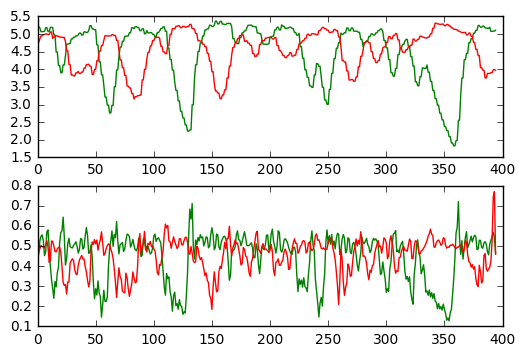

In [76]:
plt.subplot(2,1,1)
plt.plot(fly.ca_cam_left_model_fits['iii3'][idxs],color = 'g')
plt.plot(fly.ca_cam_left_model_fits['b3'][idxs],color = 'r')
#plt.twinx()
plt.subplot(2,1,2)
plt.plot(iii3_decon,color = 'g')
plt.plot(b3_decon,color = 'r')

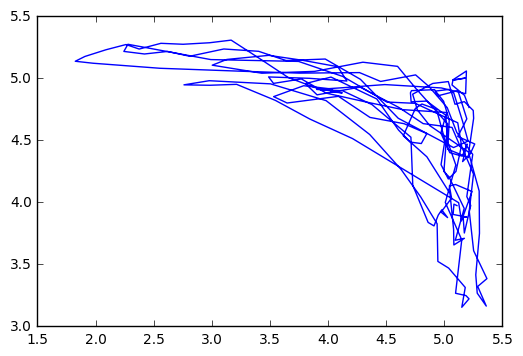

In [77]:
plt.plot(fly.ca_cam_left_model_fits['iii3'][idxs],
         fly.ca_cam_left_model_fits['b3'][idxs])

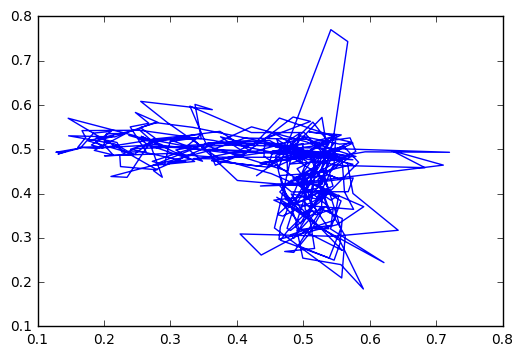

In [78]:
plt.plot(iii3_decon,
         b3_decon)

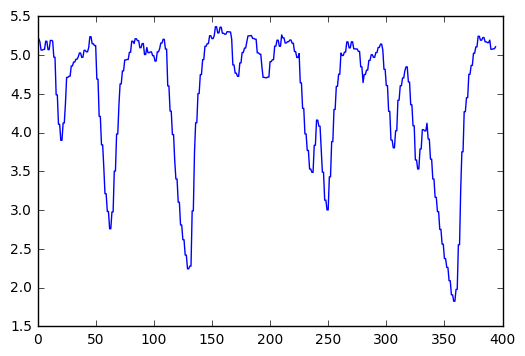

In [37]:
plt.plot(sig)

In [38]:
c2,b2,c12,g2,sn2,sp2 = constrained_foopsi(sig)

Exception: calcium_fit is not valued

In [39]:
np.shape(sig)

(395,)

In [41]:
import pygst

ImportError: No module named pygst

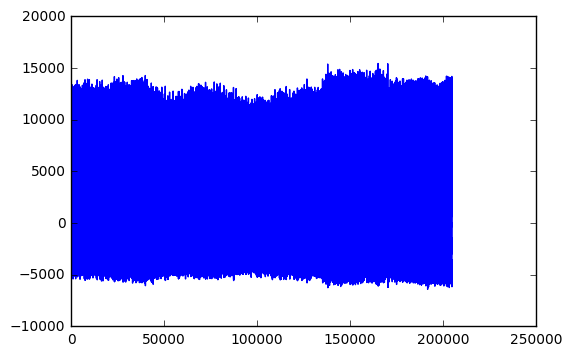

In [62]:
import pyaudio
import numpy as np
from matplotlib import pyplot as plt

CHUNKSIZE = 1024*100 # fixed chunk size

# initialize portaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=2, rate=44100, input=True, frames_per_buffer=CHUNKSIZE)

# do this as long as you want fresh samples
data = stream.read(CHUNKSIZE)
numpydata = np.fromstring(data, dtype=np.int16)

# plot data
plt.plot(numpydata)
plt.show()

# close stream
stream.stop_stream()

stream.close()
p.terminate()

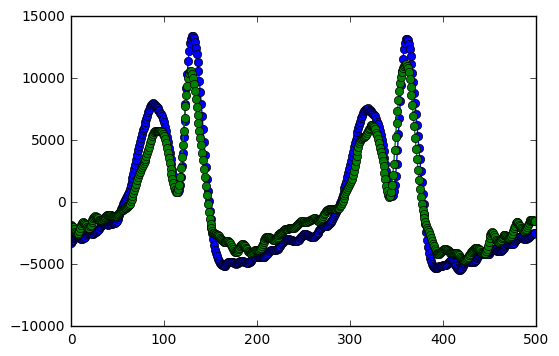

In [67]:
plt.plot(numpydata[4000:5000:2],'-o')
plt.plot(numpydata[4001:5000:2],'-o')